In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import vizualization as viz

import config
import getdata as gd
from modeling_main import get_one_model, get_multiple_models

import warnings
warnings.filterwarnings('ignore')

## Comparision between various Trend Labeling methods

#### Metrics for modeling one ticker

In [2]:
methods = ['trend_labeling', 'exp_ma', 'sim_ma']

clfs = {}
model_metrics_df = pd.DataFrame()

for method in methods:
    clf, model_metrics = get_one_model('GLP', method=method)
    clfs[method] = clf
    model_metrics_df = pd.concat([model_metrics_df, model_metrics], ignore_index=True)

In [3]:
model_metrics_tbl = model_metrics_df.drop(['symbol', 'type', 'best_model', 'performed_on', 
                                           'event_st_date', 'event_en_date', 
                                           'rawdata_st_date', 'rawdata_en_date',	
                                           'SPY_st_date', 'SPY_en_date',
                                           'isDrifted',	'ks_stat', 'ks_p_value'
                                           ]
                                           , axis=1)

In [4]:
model_metrics_tbl

,best_cross_val_score,recall,precision,accuracy,run_time,train_test,cum_rtn,annualized_rtn,sharpe_ratio,method
0,0.084978,0.109989,0.069235,0.609324,0.651523,Train,0.000000,0.000000,0.00,trend_labeling
1,0.504593,0.404401,0.670784,0.694043,0.009002,Test,0.173838,0.235156,0.93,trend_labeling
2,0.273979,0.332933,0.236327,0.767590,0.159508,Train,0.000000,0.000000,0.00,exp_ma
3,0.450430,0.290681,1.000000,0.709625,0.008000,Test,0.463223,0.651307,1.73,exp_ma
4,0.080262,0.101922,0.066195,0.626175,0.630940,Train,0.000000,0.000000,0.00,sim_ma
5,0.152122,0.104355,0.280534,0.553358,0.009049,Test,-0.001159,-0.001527,-0.14,sim_ma


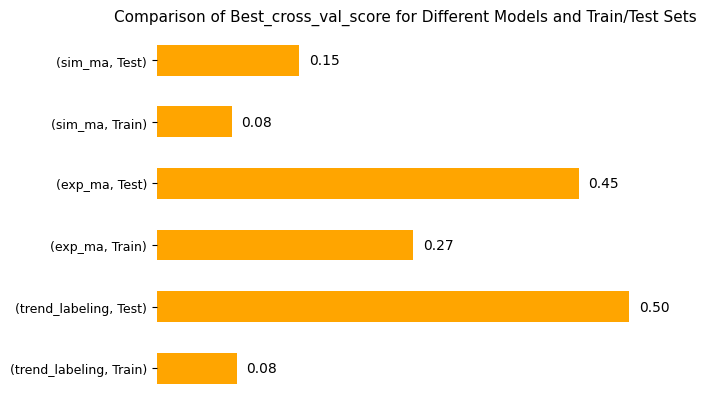

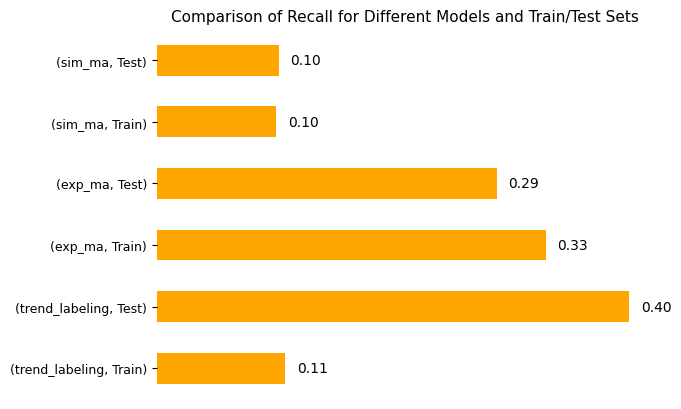

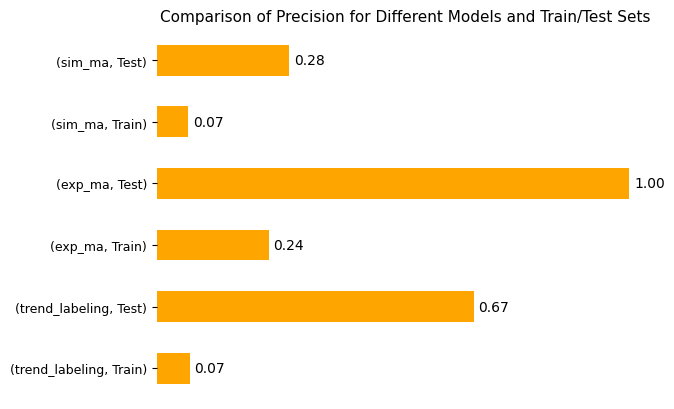

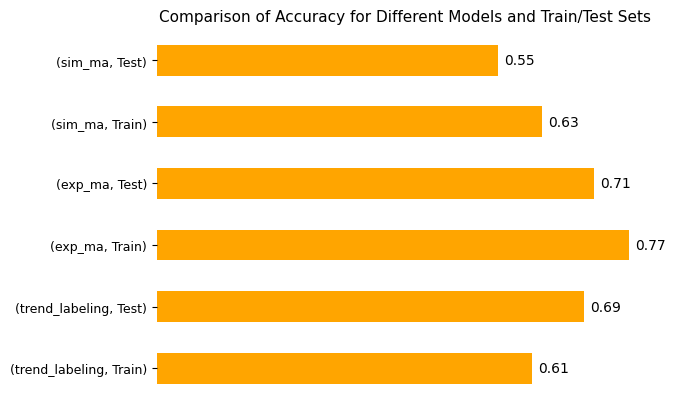

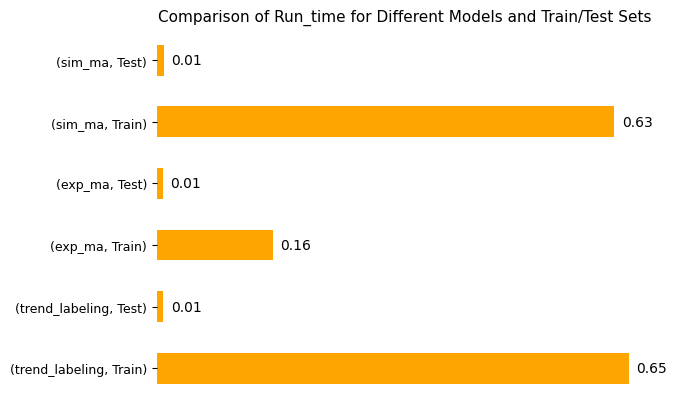

In [7]:
model_metrics_tbl_temp = model_metrics_tbl.set_index(['method', 'train_test'])

viz.plot_model_metrics(model_metrics_tbl_temp[['best_cross_val_score','recall','precision','accuracy','run_time']])


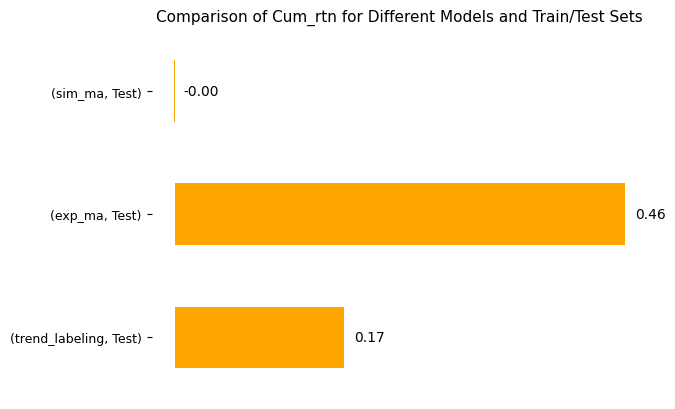

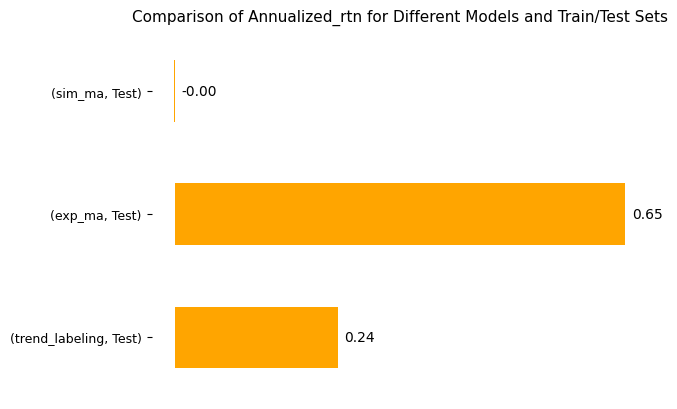

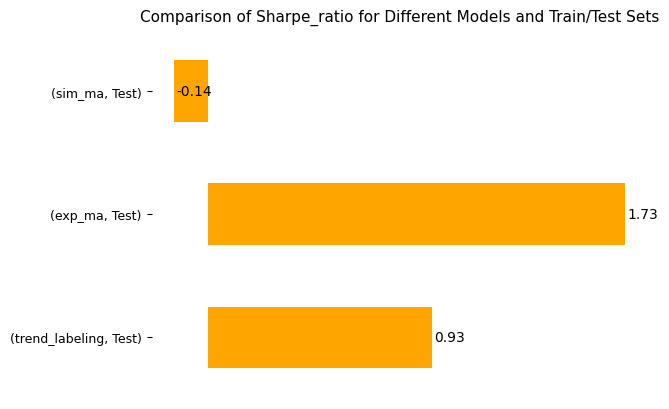

In [13]:
viz.plot_model_metrics(model_metrics_tbl_temp.loc[pd.IndexSlice[:, 'Test'], ['cum_rtn','annualized_rtn','sharpe_ratio']])

#### Metrics for list of tickers models

In [10]:
pgConnStr = gd.pgDictToConn(config.pgSecrets)

lowest_price = 30
highest_price = 40

tickerlst = gd.getFilteredTickerList_Daily(lowest_price=lowest_price, highest_price=highest_price)
print('There are {} tickers between ${} and ${}'.format(len(tickerlst), lowest_price, highest_price))

There are 20 tickers between $30 and $40


In [11]:
basket_clfs = {}
basket_model_metrics_df = pd.DataFrame()

for method in methods:
    clf, model_metrics = get_multiple_models(tickerlst, method=method)
    basket_clfs[method] = clf
    basket_model_metrics_df = pd.concat([basket_model_metrics_df, model_metrics], ignore_index=True)

Processing 1/20 AQNU...
Small sample size - Unable to train model for AQNU
Modeling completed 1/20 AQNU
Processing 2/20 ATEX...
Modeling completed 2/20 ATEX
Processing 3/20 AVID...
Modeling completed 3/20 AVID
Processing 4/20 AVNS...
Modeling completed 4/20 AVNS
Processing 5/20 BROS...
Small sample size - Unable to train model for BROS
Modeling completed 5/20 BROS
Processing 6/20 CIR...
Modeling completed 6/20 CIR
Processing 7/20 CPSI...
Modeling completed 7/20 CPSI
Processing 8/20 CRTO...
Modeling completed 8/20 CRTO
Processing 9/20 DMLP...
Modeling completed 9/20 DMLP
Processing 10/20 EGRX...
Modeling completed 10/20 EGRX
Processing 11/20 FDP...
Modeling completed 11/20 FDP
Processing 12/20 FSBW...
Modeling completed 12/20 FSBW
Processing 13/20 GLP...
Modeling completed 13/20 GLP
Processing 14/20 GPRE...
Modeling completed 14/20 GPRE
Processing 15/20 KYMR...
Small sample size - Unable to train model for KYMR
Modeling completed 15/20 KYMR
Processing 16/20 PRCT...
Small sample size - U

In [14]:
basket_model_metrics_tbl = basket_model_metrics_df.drop([ 'type', 'best_model', 'performed_on', 
                                           'event_st_date', 'event_en_date', 
                                           'rawdata_st_date', 'rawdata_en_date',	
                                           'SPY_st_date', 'SPY_en_date',
                                           'isDrifted',	'ks_stat', 'ks_p_value'
                                           ]
                                           , axis=1).dropna()

In [18]:
basket_model_metrics_tbl = basket_model_metrics_tbl.groupby(['method', 'train_test'])\
    .agg({'best_cross_val_score': 'mean', 
          'recall': 'mean', 
          'precision': 'mean', 
          'accuracy': 'mean', 
          'run_time': 'mean', 
          'cum_rtn':'mean',
          'annualized_rtn':'mean',
          'sharpe_ratio':'mean',
          'symbol': pd.Series.nunique})

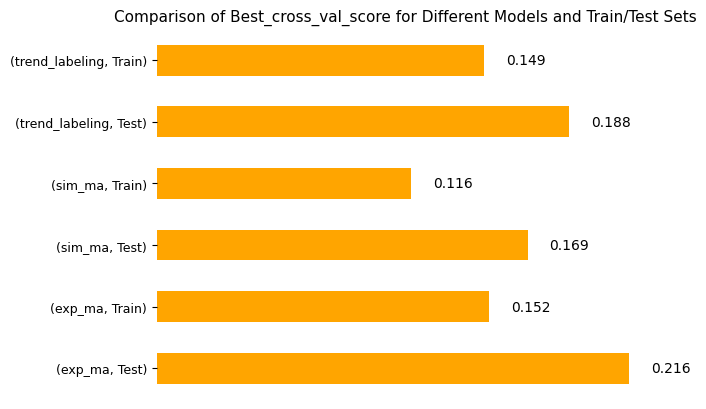

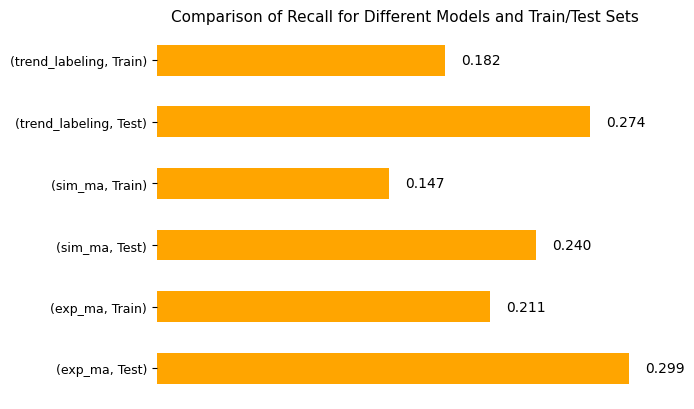

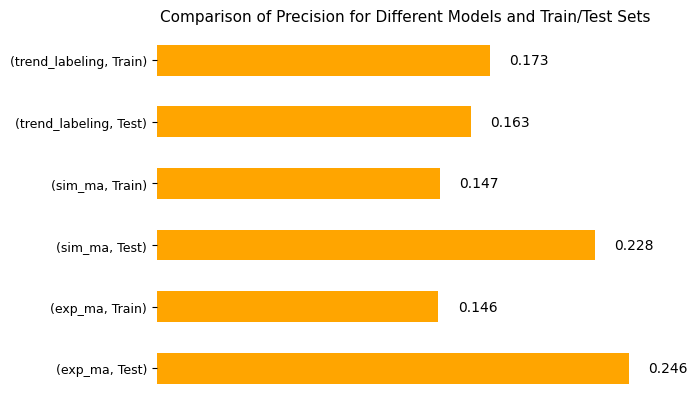

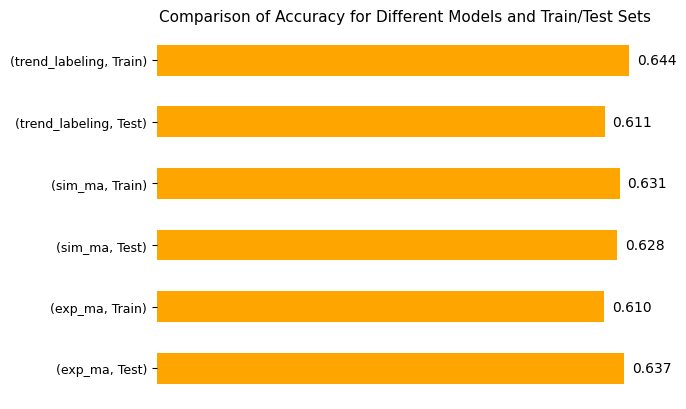

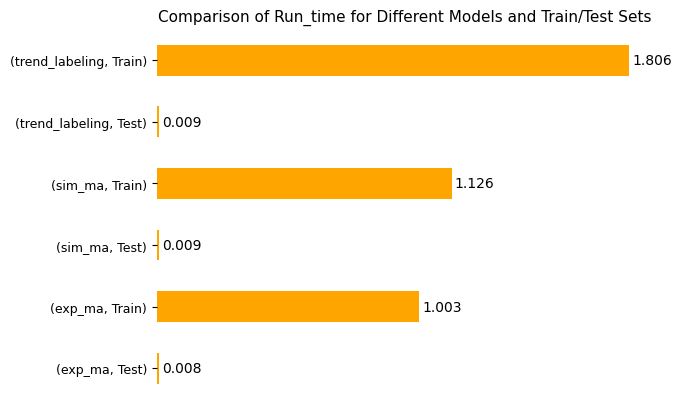

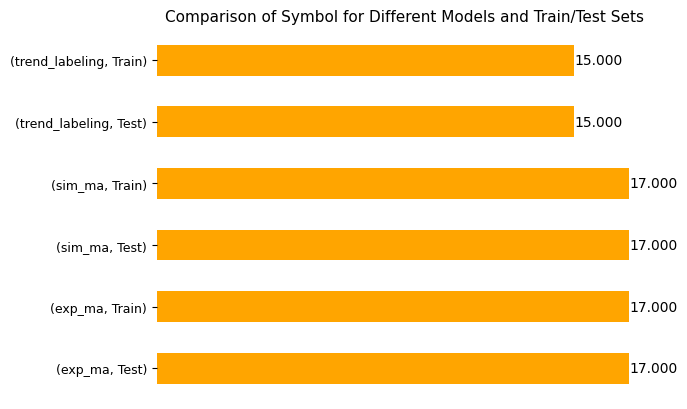

In [20]:
viz.plot_model_metrics(basket_model_metrics_tbl[['best_cross_val_score','recall','precision','accuracy','run_time']])

In [ ]:
viz.plot_model_metrics(basket_model_metrics_tbl.loc[pd.IndexSlice[:, 'Test'], ['cum_rtn','annualized_rtn','sharpe_ratio']])